In [29]:
import pickle
with open(r'C:\Users\arune\OneDrive\Desktop\AmazonMusicClustering\data\AmazonMusic_data.pkl', 'rb') as file:
    dataset = pickle.load(file)

dataset.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.153476,-1.511128,-0.757909,-0.427109,1.616187,-0.353338,0.538584,0.321287,0.515005,-0.401735
1,-1.028518,-1.528056,-1.098629,-0.369741,1.604081,-0.353405,-0.521537,-0.577455,-1.294487,0.124906
2,-0.488051,-1.418027,-1.127899,-0.398062,1.622240,-0.353405,1.039046,-0.375943,-1.560003,-0.003949
3,0.573581,-0.313510,-0.470677,-0.013914,1.610134,-0.353405,-0.031836,0.611464,0.405268,-0.397437
4,0.406294,-1.028695,-0.768227,-0.111948,1.610134,-0.353405,0.796887,1.087031,-1.377593,-0.346143


In [30]:
from sklearn.cluster import DBSCAN
import numpy as np
sample_index = np.random.choice(dataset.shape[0], 20000, replace=False)
sample_data = dataset.iloc[sample_index]
sample_data.shape

(20000, 10)

In [20]:
for eps_val in [0.5, 0.6, 0.7, 0.8, 1.0]:
    db = DBSCAN(eps=eps_val, min_samples=5)
    labels = db.fit_predict(sample_data)
    print(f"eps={eps_val} → clusters={len(set(labels)) - (1 if -1 in labels else 0)}, noise={list(labels).count(-1)}")


eps=0.5 → clusters=42, noise=19665
eps=0.6 → clusters=130, noise=17499
eps=0.7 → clusters=107, noise=13559
eps=0.8 → clusters=67, noise=9477
eps=1.0 → clusters=33, noise=4505


In [31]:

db = DBSCAN(eps=1.0, min_samples=4, metric='euclidean')
sample_data['DBSCAN_Cluster'] = db.fit_predict(sample_data)


C:\Users\arune\AppData\Local\Temp\ipykernel_16948\3726434939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['DBSCAN_Cluster'] = db.fit_predict(sample_data)


In [32]:
sample_data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,DBSCAN_Cluster
70592,-1.794181,0.507472,1.145319,-0.484840,0.339003,-0.353405,0.081171,-1.157809,-0.194164,-1.197229,-1
84755,-0.082700,1.243817,0.432083,-0.302933,0.656786,-0.353405,2.970941,-0.267127,-0.874417,0.208701,-1
51466,0.148928,0.503240,-0.269572,-0.013914,-0.992658,-0.352828,-0.381622,1.256301,0.472541,0.454846,0
9346,0.065285,1.332686,0.277516,-0.407502,-0.121025,-0.353405,-0.936436,0.341438,0.308515,-0.433556,0
91657,0.251875,0.562486,1.045083,-0.497548,-0.820147,-0.353405,0.221086,-0.315490,-0.182571,-0.056152,0
...,...,...,...,...,...,...,...,...,...,...,...
43033,-1.137899,-1.358781,-1.569698,-0.301117,0.880747,-0.353405,0.425576,-0.859572,0.086820,-0.104500,0
69191,2.381573,1.138020,1.464981,0.142214,-1.225699,-0.351594,-0.884776,1.534387,0.346375,-0.454192,0
84981,2.059867,1.298831,0.574435,-0.414038,-1.152760,0.464016,-0.661451,-1.657558,0.181387,-0.200260,-1
77207,-0.024793,-0.668987,-0.271046,-0.478667,-0.699087,-0.353276,-0.489249,-0.742695,0.616462,0.288037,0


In [33]:
sample_data['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0     14863
-1      4343
 2       392
 5        48
 10       42
       ...  
 46        3
 45        3
 53        2
 20        2
 34        2
Name: count, Length: 68, dtype: int64

In [34]:
## Silhouette Score (excluding noise)
from sklearn.metrics import silhouette_score

mask = sample_data['DBSCAN_Cluster'] != -1
score = silhouette_score(sample_data[mask], sample_data['DBSCAN_Cluster'][mask])
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.208


C:\Users\arune\AppData\Local\Temp\ipykernel_16948\62653826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['PCA1'] = df_pca[:, 0]
C:\Users\arune\AppData\Local\Temp\ipykernel_16948\62653826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['PCA2'] = df_pca[:, 1]


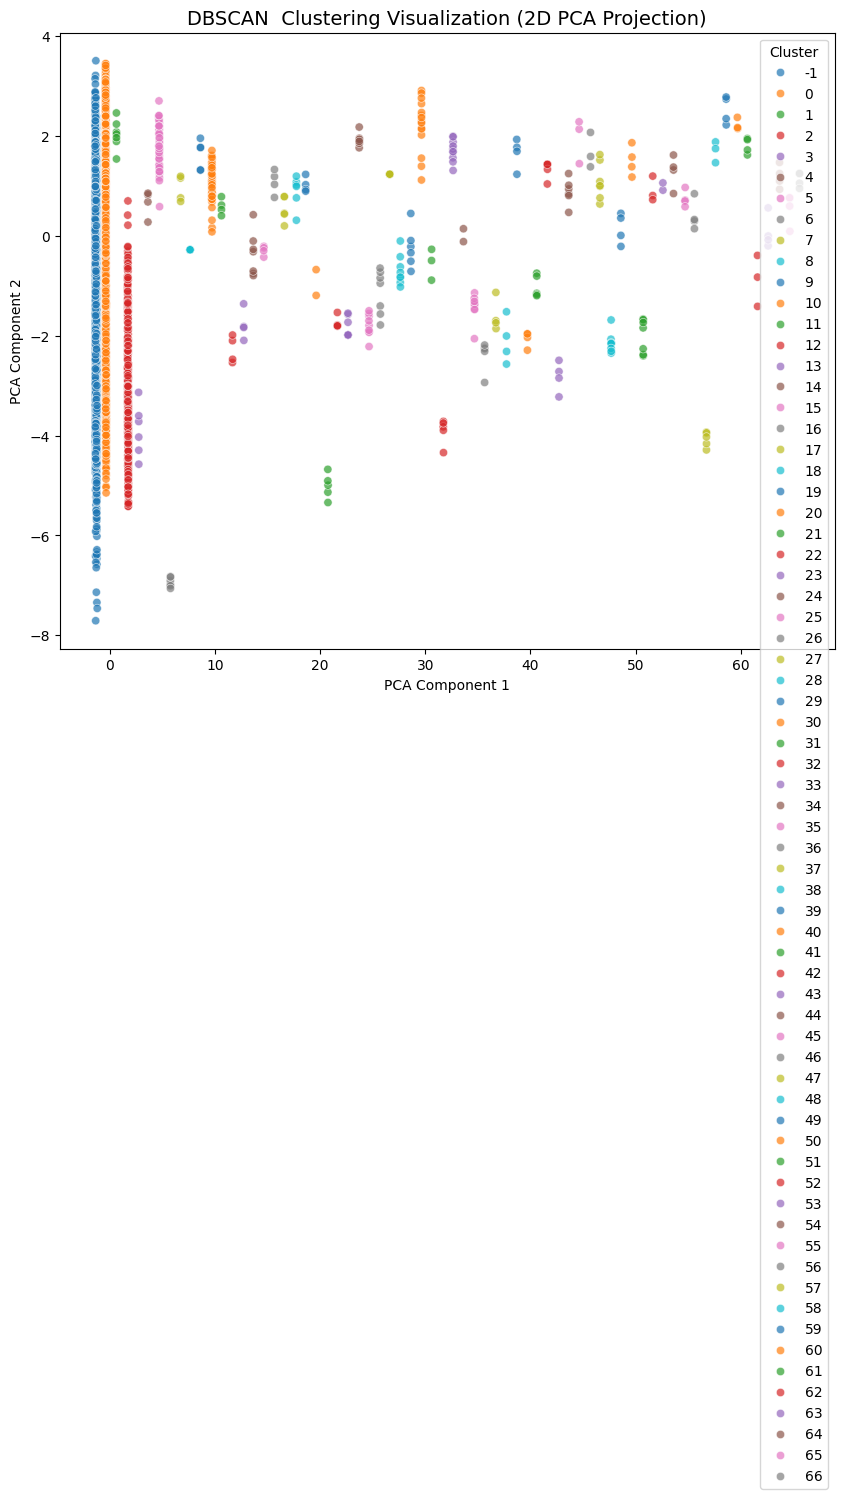

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(sample_data)

sample_data['PCA1'] = df_pca[:, 0]
sample_data['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    data=sample_data,
    x='PCA1',
    y='PCA2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    alpha=0.7
)

plt.title("DBSCAN  Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [36]:
sample_data.to_csv(r"C:\Users\arune\OneDrive\Desktop\AmazonMusicClustering\CleanedFile\clustered_songs.csv", index=False)


In [37]:
with open(r"C:\Users\arune\OneDrive\Desktop\AmazonMusicClustering\data\DBScanCluster.pkl",'wb') as file:
    pickle.dump(db, file)